### Unsupervised Machine Learning
<p>A kind of machine learning where a model must look for patterns in a dataset with no labels and with minimal human supervision. This is in contrast to supervised learning techniques, such as classification or regression, where a model is given a training set of inputs and a set of observations, and must learn a mapping from the inputs to the observations. In unsupervised learning, only the inputs are available, and a model must look for interesting patterns in the data. Unsupervised machine learning brings order to the dataset and make some sense out of it.<br></p>

* Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition.
* As the defintion of Unsupervised Machine Learning suggests that we have to find patterns in the dataset and this organization of unlabeled data into similar groups called clusters.
* A <b>cluster</b> is a collection of data items which are "SIMILAR" between them, and "DISSIMILAR" to data items in other clusters.
* <b>Segmentation</b> is the process of putting customers into groups based on similarities, and clustering is the process of finding similarities in customers so that they can be grouped, and therefore segmented.

### Types of Segmentation
* <b>Heuristic Segmentation</b> : We find groups on the basis of some rules that we create by ourselves.
* <b>Scientific Segmentation</b>: We find groups on the basis of the similarity of observation which is determined by an algorithm / we use some rules where the rule is created by the machine/algorithm.


We are going to study RFM Segmentation
* RFM is a data modeling method used to analyze customer value. It stands for recency, frequency, and monetary, which are just three metrics that describe what your customers did. 
* It is the most simple and proven analysis technique that is used by marketing people for customer segmentation.
* It groups the customers on the basis of their transaction history that how recently (RECENCY), how often (FREQUENCY) and how much did they buy (MONETARY).


In [5]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

### 1 Data Import 

<a href = 'https://archive.ics.uci.edu/ml/datasets/online+retail'> Link for Dataset </a>

In [6]:
online_retail = pd.read_excel('Online Retail.xlsx')
online_retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
online_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
def continuous_var(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),
                     x.min(),x.quantile(0.01),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),
                     x.quantile(0.75),x.quantile(0.99),x.max()],
                    index = ["N","NMISS","SUM","MEAN","MEDIAN","STD","vARIANCE",
                            "MIN","P1","P10","P25","P50","P75","P99","MAX"])

In [11]:
def categorical_var(x):
    Mode = x.value_counts().sort_values(ascending=False)[0:1].reset_index()
    return pd.Series([x.count(),x.isnull().sum(),Mode.iloc[0,0],Mode.iloc[0,1],round(Mode.iloc[0,1]*100/x.count(),2)],
                    index = ["N","NMISS","MODE","FREQ","PERCENT"])

In [12]:
online_retail.select_dtypes(['int64','float64']).apply(continuous_var).round(2)

,Quantity,UnitPrice,CustomerID
N,541909.00,541909.00,4.068290e+05
NMISS,0.00,0.00,1.350800e+05
SUM,5176450.00,2498803.97,6.219476e+09
MEAN,9.55,4.61,1.528769e+04
MEDIAN,3.00,2.08,1.515200e+04
STD,218.08,96.76,1.713600e+03
vARIANCE,47559.39,9362.47,2.936426e+06
MIN,-80995.00,-11062.06,1.234600e+04
P1,-2.00,0.19,1.241500e+04
P10,1.00,0.63,1.287600e+04


In [13]:
online_retail.select_dtypes(['object']).apply(categorical_var).round(2)

,InvoiceNo,StockCode,Description,Country
N,541909.00,541909,540455,541909
NMISS,0.00,0,1454,0
MODE,573585.00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
FREQ,1114.00,2313,2369,495478
PERCENT,0.21,0.43,0.44,91.43


#### As we can see that we have negative and missing values in the data so we would treat them in the following steps.

### 2 Data Pre-Processing 

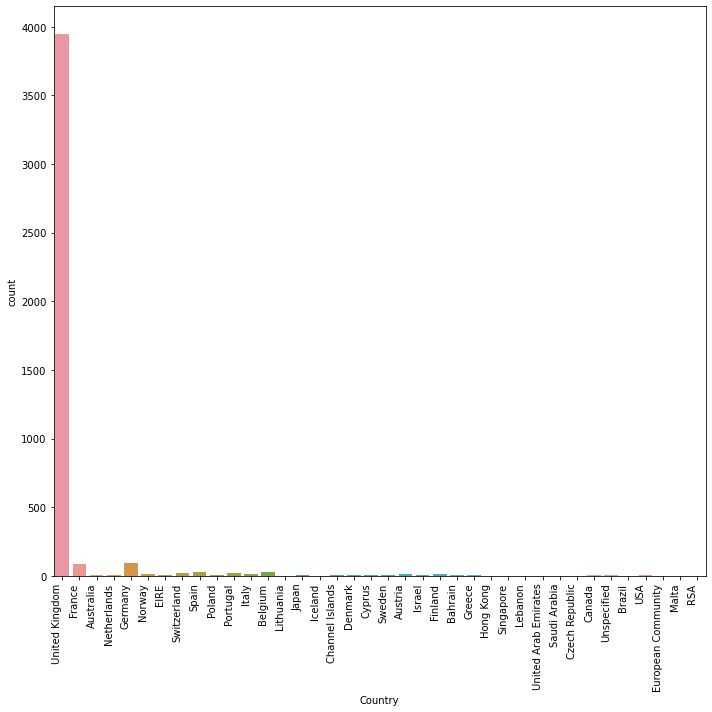

That's a highly biased dataset for the country UK


In [14]:
Customer_cnt = online_retail[['CustomerID','Country']].drop_duplicates()
Customer_cnt.groupby(['Country']).count().reset_index().sort_values('CustomerID',ascending = False)

plt.figure(figsize=(10,10))
ax = sns.countplot(x = 'Country', data = Customer_cnt)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, ha = 'right')
plt.tight_layout()
plt.show()
print("That's a highly biased dataset for the country UK")

### 2.1 Data Cleaning and Balancing

In [15]:
online_retail = online_retail[online_retail['Country'] == 'United Kingdom']
# as the data is highly biased so we will do the analysis for United Kingom
online_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [16]:
online_retail = online_retail[pd.notnull(online_retail['CustomerID'])]
online_retail.isnull().sum()                                                   

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
online_retail = online_retail[online_retail['Quantity']>0] 

In [18]:
online_retail.select_dtypes(['int64','float64']).apply(continuous_var).round(2)

,Quantity,UnitPrice,CustomerID
N,354345.00,354345.00,3.543450e+05
NMISS,0.00,0.00,0.000000e+00
SUM,4269472.00,1050205.16,5.510928e+09
MEAN,12.05,2.96,1.555244e+04
MEDIAN,4.00,1.95,1.552200e+04
STD,190.43,17.86,1.594550e+03
vARIANCE,36262.87,319.05,2.542577e+06
MIN,1.00,0.00,1.234600e+04
P1,1.00,0.21,1.274800e+04
P10,1.00,0.42,1.330900e+04


In [19]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


### 2.2 Data Manipulation

In [20]:
# to get the unique values in all columns
for i in online_retail.columns:
    c = online_retail[i].nunique()
    print(i, ":" ,c)

InvoiceNo : 16649
StockCode : 3645
Description : 3844
Quantity : 294
InvoiceDate : 15615
UnitPrice : 403
CustomerID : 3921
Country : 1


In [21]:
online_retail["Total_Sales"] = online_retail["Quantity"]*online_retail["UnitPrice"]

In [22]:
now = dt.date(2021,4,22)

In [23]:
online_retail['date'] = pd.DatetimeIndex(online_retail.InvoiceDate).date

### RFM

* For Recency, Calculate the number of days between present date and date of last purchase each customer.
* For Frequency, Calculate the number of orders for each customer.
* For Monetary, Calculate sum of purchase price for each customer.

In [24]:
df_recency = online_retail.groupby(['CustomerID'],as_index=False)['date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

In [25]:
df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(now - x).days)

In [26]:
df_recency.head()

,CustomerID,Last_Purchase_Date,Recency
0,12346.0,2011-01-18,3747
1,12747.0,2011-12-07,3424
2,12748.0,2011-12-09,3422
3,12749.0,2011-12-06,3425
4,12820.0,2011-12-06,3425


In [27]:
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)

In [28]:
FM_Table = online_retail.groupby('CustomerID').agg({'InvoiceNo' : lambda x:len(x),
                                         'Total_Sales' : lambda x:x.sum()})

In [29]:
FM_Table.rename(columns = {'InvoiceNo' :'Frequency',
                           'Total_Sales':'Monetary_Value'},inplace= True)

In [30]:
FM_Table

,Frequency,Monetary_Value
CustomerID,,
12346.0,1,77183.60
12747.0,103,4196.01
12748.0,4596,33719.73
12749.0,199,4090.88
12820.0,59,942.34
...,...,...
18280.0,10,180.60
18281.0,7,80.82
18282.0,12,178.05


In [31]:
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

,CustomerID,Recency,Frequency,Monetary_Value
0,12346.0,3747,1,77183.60
1,12747.0,3424,103,4196.01
2,12748.0,3422,4596,33719.73
3,12749.0,3425,199,4090.88
4,12820.0,3425,59,942.34


In [32]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [33]:
segmented_rfm = RFM_Table.copy()

In [34]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [35]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary_Value'].apply(FMScore, args=('Monetary_Value',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile
0,12346.0,3747,1,77183.60,4,4,1
1,12747.0,3424,103,4196.01,1,1,1
2,12748.0,3422,4596,33719.73,1,1,1
3,12749.0,3425,199,4090.88,1,1,1
4,12820.0,3425,59,942.34,1,2,2


In [36]:
segmented_rfm['RFMScore'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [37]:
segmented_rfm

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFMScore
0,12346.0,3747,1,77183.60,4,4,1,441
1,12747.0,3424,103,4196.01,1,1,1,111
2,12748.0,3422,4596,33719.73,1,1,1,111
3,12749.0,3425,199,4090.88,1,1,1,111
4,12820.0,3425,59,942.34,1,2,2,122
...,...,...,...,...,...,...,...,...
3916,18280.0,3699,10,180.60,4,4,4,444
3917,18281.0,3602,7,80.82,4,4,4,444
3918,18282.0,3429,12,178.05,1,4,4,144
3919,18283.0,3425,756,2094.88,1,1,1,111


In [38]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary_Value,R_quartile,F_quartile,M_quartile,RFMScore,RFM_Score
0,12346.0,3747,1,77183.60,4,4,1,441,9
1,12747.0,3424,103,4196.01,1,1,1,111,3
2,12748.0,3422,4596,33719.73,1,1,1,111,3
3,12749.0,3425,199,4090.88,1,1,1,111,3
4,12820.0,3425,59,942.34,1,2,2,122,5


In [39]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFMScore']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFMScore']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='444']))

Best Customers:  409
Loyal Customers:  980
Big Spenders:  980
Almost Lost:  21
Lost Customers:  168
Lost Cheap Customers:  343


### Now we can further plan strategies for these customers for Targeting or any other task.